# Configurações Iniciais

## Importações das bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt

## Base de dados do Kaggle

In [33]:
dataset = pd.read_csv("datasets/machine_failure_dataset.csv") # Criando um dataframe com os dados
dataset.head() #Exibindo as 5 primeiras linhas do dataset

,Temperature,Vibration,Power_Usage,Humidity,Machine_Type,Failure_Risk
0,74.967142,56.996777,8.649643,20.460962,Mill,1
1,68.617357,54.623168,9.710963,25.698075,Lathe,0
2,76.476885,50.298152,8.415160,27.931972,Drill,1
3,85.230299,46.765316,9.384077,39.438438,Lathe,1
4,67.658466,53.491117,6.212771,32.782766,Drill,1


In [34]:
dataset.info() # Informações sobre o banco de dados, como número de linhas e colunas, quantidade de elementos nulos e tipo de variável

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   1000 non-null   float64
 1   Vibration     1000 non-null   float64
 2   Power_Usage   1000 non-null   float64
 3   Humidity      1000 non-null   float64
 4   Machine_Type  1000 non-null   object 
 5   Failure_Risk  1000 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 47.0+ KB


In [35]:
dataset.duplicated().value_counts() # Verificando a presença de linhas duplicadas

False    1000
Name: count, dtype: int64

In [36]:
dataset['Failure_Risk'] = dataset['Failure_Risk'].map(lambda x: 'Sim' if x == 1 else 'Não') # Decodificando a variável de classificação de risco

count     1000
unique       2
top        Não
freq       700
Name: Failure_Risk, dtype: object

In [38]:
dataset['Failure_Risk'].value_counts() # Observando as alterações feitas na coluna 'Failure_Risk' através da contagem de seus valores

Failure_Risk
Não    700
Sim    300
Name: count, dtype: int64

# Análise dos Atributos

Os dados analisados são provenientes de uma amostra de dados coletados de sensores de máquinas em um ambiente de fabricação industrial associados ou não a um risco de falha. Os atributos desse dataset são:
- Temperature: Indica a temperatura em graus Celsius de operação da máquina. (Atributo preditivo quantitativo contínuo)
- Vibration: Indica a frequência de vibração da máquina em Hz. (Atributo preditivo quantitativo contínuo)
- Power_Usage: Indica o consumo de energia em kW. (Atributo preditivo quantitativo contínuo)
- Humidity: Indica a umidade do ambiente em percentual. (Atributo preditivo quantitativo contínuo)
- Machine_Type: Categoriza a máquina em 'Mill', 'Lathe' e 'Drill'. (Atributo preditivo qualitativo nominal)
- Failure_Risk: Classificação binário do risco de falha, sendo 0 para ausência de risco e 1 para presença. (Atributo alvo qualitativo nominal)

In [22]:
dataset.nunique() # Quantidade de elementos únicos em cada coluna

Temperature     1000
Vibration       1000
Power_Usage     1000
Humidity        1000
Machine_Type       3
Failure_Risk       2
dtype: int64

A partir dessa primeira análise do dataset é possível observar que os dados coletados pelos sensores fornecem informações sobre o estado de operação de uma amostra composta por 3 tipos de máquinas que possuem uma classificação de risco binária, com 0 para ausência de risco e 1 para um risco potencial.

# Análise Descritiva

In [39]:
# Separação das colunas por tipo para facilitar a análise estatística
quantitativos = ['Temperature', 'Vibration', 'Power_Usage', 'Humidity'] # Array contendo os nomes das colunas dos atributos quantitativos
qualitativos = ['Machine_Type', 'Failure_Risk'] # Array contendo os nomes das colunas dos atributos qualitativos

## Medidas de posição

- **Média:**

In [40]:
dataset[quantitativos].mean() # Cálculo das médias dos atributos quantitativos

Temperature    70.193321
Vibration      50.354181
Power_Usage    10.011668
Humidity       29.906404
dtype: float64

- **Moda:**

In [43]:
dataset[quantitativos].mode().iloc[0] # Cálculo da moda dos atributos quantitativos

Temperature    37.587327
Vibration      35.298057
Power_Usage     3.960976
Humidity       15.352757
Name: 0, dtype: float64

- **Mediana:**

In [44]:
dataset[quantitativos].median() # Cálculo das medianas dos atributos quantitativos

Temperature    70.253006
Vibration      50.315386
Power_Usage     9.999498
Humidity       30.000923
dtype: float64

- **Quartis:**

In [50]:
dataset[quantitativos].quantile([0.25, 0.5, 0.75]) # Obtenção dos quartis Q1, Q2 e Q3 para os atributos quantitativos

,Temperature,Vibration,Power_Usage,Humidity
0.25,63.524097,46.968792,8.704001,26.312898
0.50,70.253006,50.315386,9.999498,30.000923
0.75,76.479439,53.644411,11.321831,33.334727


## Medidas de Dispersão

- **Amplitude Total:**

In [51]:
(dataset[quantitativos].max()-dataset[quantitativos].min()) # Cálculo da amplitude total dos atributos quantitativos (valor máximo - valor mínimo)

Temperature    70.939988
Vibration      30.667481
Power_Usage    13.891500
Humidity       30.862708
dtype: float64

- **Desvio Padrão:**

In [45]:
dataset[quantitativos].std() # Obtenção do desvio padrão dos atributos quantitativos da amostra

Temperature    9.792159
Vibration      4.987272
Power_Usage    1.966909
Humidity       5.135663
dtype: float64

- **Variância:**

In [46]:
dataset[quantitativos].var() # Obtenção da variância dos atributos quantitativos da amostra

Temperature    95.886385
Vibration      24.872881
Power_Usage     3.868729
Humidity       26.375031
dtype: float64

- **Coeficiente de Variação:**

In [47]:
(dataset[quantitativos].std()/dataset[quantitativos].mean())*100 # Cálculo do coeficiente de variação (desvio/média) em percentual

Temperature    13.950272
Vibration       9.904385
Power_Usage    19.646162
Humidity       17.172451
dtype: float64

## Medidas de Assimetria

- **Coeficiente de assimetria:**

In [55]:
dataset[quantitativos].skew() # Cálculo do coeficiente de assimetria dos atributos quantitativos

Temperature    0.116976
Vibration     -0.049396
Power_Usage    0.061247
Humidity      -0.002121
dtype: float64

## Distribuição de frequências

- **Frequência da coluna 'Machine_Type':**

In [57]:
type_freq = dataset['Machine_Type'].value_counts() # Obtenção da frequencia simples absoluta da coluna Machine_Type
type_perc = dataset['Machine_Type'].value_counts(normalize=True)*100 # Obtenção da frequência simples relativa da coluna Machine_Type
tb_type = pd.DataFrame({'Frequência': type_freq,
                        'Percentual': type_perc.map('{:.2f}%'.format)})
tb_type

,Frequência,Percentual
Machine_Type,,
Lathe,338,33.80%
Drill,334,33.40%
Mill,328,32.80%


- **Frequência da coluna 'Failure_Risk':**

In [59]:
risk_freq = dataset['Failure_Risk'].value_counts() # Obtenção da frequência simples absoluta da coluna Failure_Risk
risk_perc = dataset['Failure_Risk'].value_counts(normalize=True)*100 # Obtenção da frequência simples relativa da coluna Failure_Risk
tb_risk = pd.DataFrame({'Frequência': risk_freq,
                        'Percentual': risk_perc.map('{:.2f}%'.format)})
tb_risk

,Frequência,Percentual
Failure_Risk,,
Não,700,70.00%
Sim,300,30.00%


# Análise Gráfica

## Variáveis Quantitativas:

- **Histogramas**

C:\Users\carol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


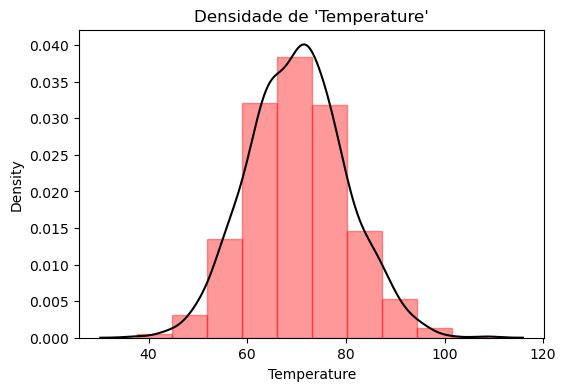

In [129]:
plt.figure(figsize=[6,4])
# Criando um gráfico para visualização da densidade da coluna 'Temperature'
plt.hist(data = dataset, x = 'Temperature', color='red', histtype='bar', rwidth=2, edgecolor='red', density=True, alpha=.4)
plt.title("Densidade de 'Temperature'")
sns.kdeplot(dataset['Temperature'], color='black')
#plt.savefig('Densidade de Temperature.png') # Comando para salvar a imagem
plt.show()

C:\Users\carol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


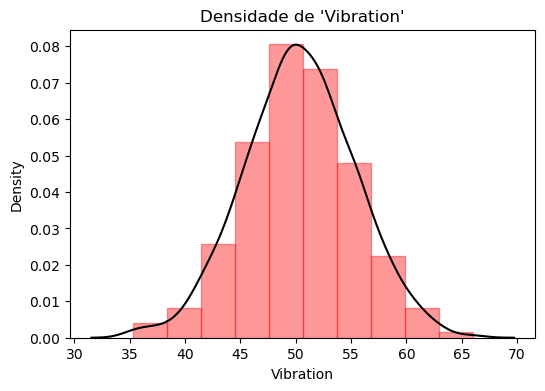

In [132]:
plt.figure(figsize=[6,4])
# Criando um gráfico para visualização da densidade do atributo 'Vibration'
plt.hist(data = dataset, x = 'Vibration', color='red', histtype='bar', rwidth=2, edgecolor='red', density=True, alpha=.4)
plt.title("Densidade de 'Vibration'")
sns.kdeplot(dataset['Vibration'], color='black')
#plt.savefig('Densidade de Vibration.png') # Comando para salvar a imagem
plt.show()

C:\Users\carol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


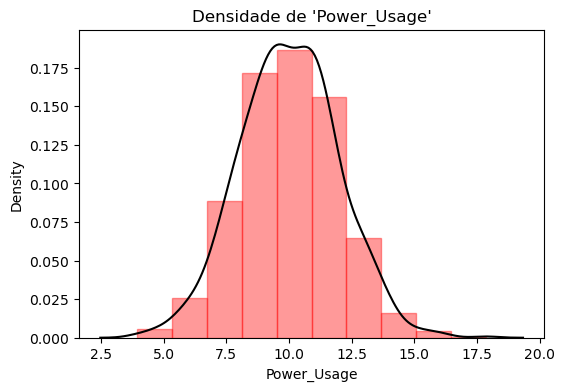

In [133]:
plt.figure(figsize=[6,4])
# Criando um gráfico para visualização da densidade da coluna 'Power_Usage'
plt.hist(data = dataset, x = 'Power_Usage', color='red', histtype='bar', rwidth=2, edgecolor='red', density=True, alpha=.4)
plt.title("Densidade de 'Power_Usage'")
sns.kdeplot(dataset['Power_Usage'], color='black')
#plt.savefig('Densidade de Power_Usage.png') # Comando para salvar a imagem
plt.show()

C:\Users\carol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


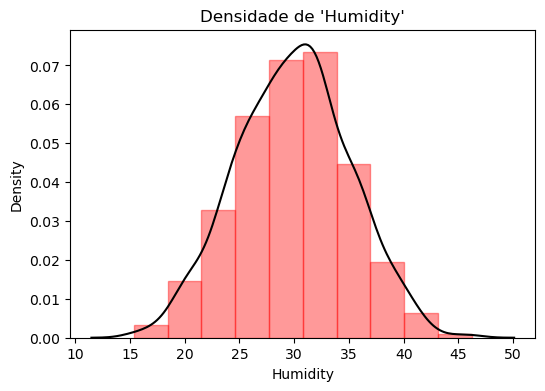

In [134]:
plt.figure(figsize=[6,4])
# Criando um gráfico para visualização da densidade da coluna 'Humidity'
plt.hist(data = dataset, x = 'Humidity', color='red', histtype='bar', rwidth=2, edgecolor='red', density=True, alpha=.4)
plt.title("Densidade de 'Humidity'")
sns.kdeplot(dataset['Humidity'], color='black')
#plt.savefig('Densidade de Humidity.png') # Comando para salvar a imagem
plt.show()

- **Boxplots**

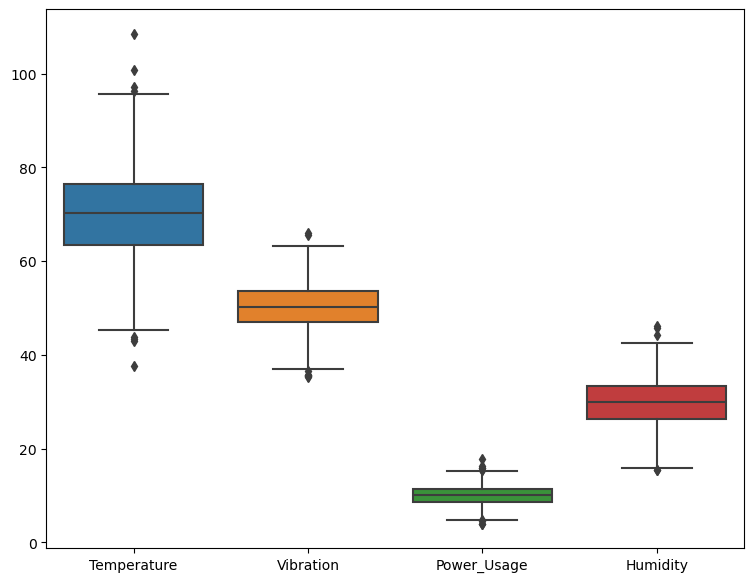

In [165]:
# Plotando boxplots para analisar a distribuição dos quartis de cada atributo quantitativo
plt.figure(figsize=[9,7])
sns.boxplot(dataset[quantitativos])
#plt.savefig('Boxplot.png') # Comando para salvar a imagem
plt.show()

## Variáveis Qualitativas

- **Gráfico de setores**

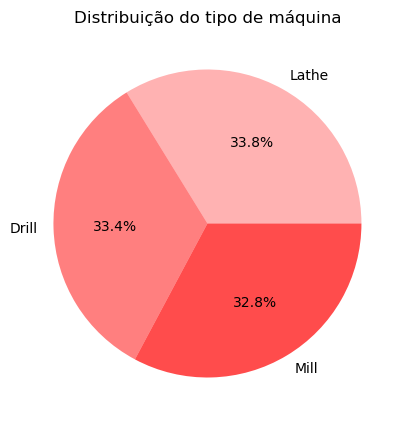

In [136]:
# Plotando um gráfico de setores para mostrar a distribuição das categorias de tipo de máquina
plt.figure(figsize = [13,5])
plt.pie(dataset['Machine_Type'].value_counts(), colors=[('red', 0.3), ('red', 0.5), ('red', 0.7)], autopct='%1.1f%%', labels= dataset['Machine_Type'].value_counts().index)
plt.title("Distribuição do tipo de máquina")
#plt.savefig('Distribuição Machine_Type.png') # Comando para salvar a imagem
plt.show()

# Análise Bivariada

## Análise dos dados relacionados a ausência de risco de falha da máquina

In [139]:
dataset_sem_falha = dataset[dataset['Failure_Risk'] == 'Não']
dataset_sem_falha.describe() # Algumas medidas de posição e de dispersão para em um contexto de ausência de risco (Coluna 'Failure_Risk' = 'Não')

,Temperature,Vibration,Power_Usage,Humidity
count,700.000000,700.000000,700.000000,700.000000
mean,70.001500,50.359817,9.984679,29.966913
std,9.864347,4.970406,1.975944,5.104983
min,43.031134,35.518723,3.960976,15.352757
25%,63.443471,46.968792,8.660477,26.353729
50%,69.746805,50.384184,9.976862,30.075281
75%,76.391551,53.482646,11.306906,33.332891
max,108.527315,65.965538,17.852475,46.215465


## Análise dos dados relacionados a presença de risco de falha da máquina

In [138]:
dataset_falha = dataset[dataset['Failure_Risk'] == 'Sim']
dataset_falha.describe() # Algumas medidas de posição e de dispersão em um contexto de presença de risco (Coluna 'Failure_Risk' = 'Sim')

,Temperature,Vibration,Power_Usage,Humidity
count,300.000000,300.000000,300.000000,300.000000
mean,70.640901,50.341031,10.074644,29.765216
std,9.623029,5.034724,1.947484,5.212403
min,37.587327,35.298057,4.504990,16.984315
25%,63.941317,46.982981,8.773018,26.018072
50%,71.148452,50.069335,10.029529,29.856784
75%,76.872311,54.108535,11.338223,33.343977
max,97.201692,65.688743,15.970518,45.760284


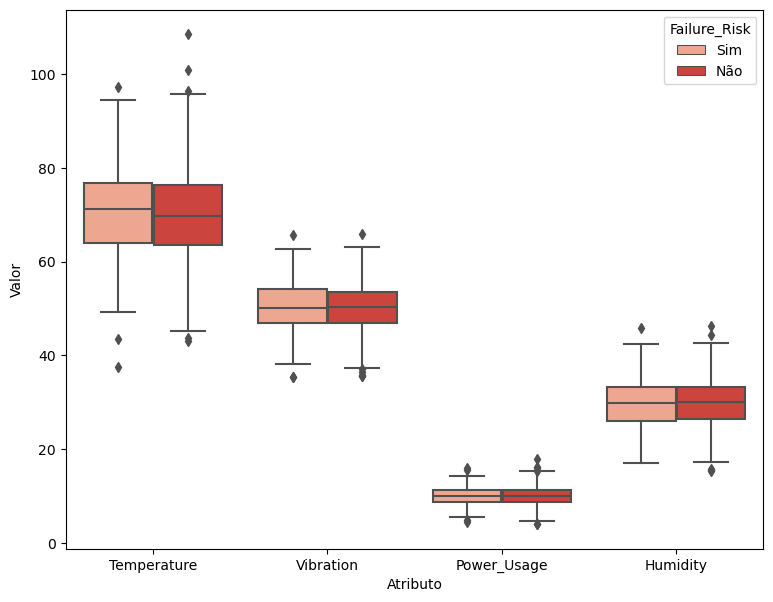

In [164]:
# Plotando boxplots para a variação das distribuições dos quartis dainte da presença ou ausência de risco de falha
dataset_long = dataset.melt(id_vars='Failure_Risk', var_name='Atributo', value_name='Valor',value_vars=quantitativos) # Criando uma versão do dataset com o tipo long
plt.figure(figsize=[9,7])
sns.boxplot(x = 'Atributo', y='Valor', hue='Failure_Risk', data=dataset_long, palette='Reds') # Plotando um boxplot que compara os percentis na ausência ou presença de risco
#plt.savefig('Boxplot Comparação.png') # Comando para salvar a imagem
plt.show()

## Análise dos dados para cada tipo de máquina

In [121]:
crossType = pd.crosstab(dataset.Machine_Type, dataset.Failure_Risk, normalize='columns', margins=True) # Obtendo a frequência simples absoluta para cada tipo de máquina
crossType

Failure_Risk,Não,Sim,All
Machine_Type,,,
Drill,0.328571,0.346667,0.334
Lathe,0.332857,0.350000,0.338
Mill,0.338571,0.303333,0.328


- **Drill**

In [112]:
dataset[dataset['Machine_Type'] == 'Drill'].describe() # Algumas medidas de posição e de dispersão para máquinas do tipo Drill

,Temperature,Vibration,Power_Usage,Humidity
count,334.000000,334.000000,334.000000,334.000000
mean,69.924919,49.885586,10.115146,29.852577
std,9.325221,4.848251,1.904376,4.931183
min,37.587327,35.298057,3.960976,15.352757
25%,63.899818,46.742986,8.914408,26.388766
50%,70.184262,49.912631,10.084434,29.975551
75%,75.828654,52.751487,11.272353,32.913480
max,94.553001,65.965538,16.219837,45.760284


- **Mill**

In [115]:
dataset[dataset['Machine_Type'] == 'Mill'].describe() # Algumas medidas de posição e de dispersão para máquinas do tipo Mill

,Temperature,Vibration,Power_Usage,Humidity
count,328.000000,328.000000,328.000000,328.000000
mean,69.911694,50.493733,9.890596,29.831719
std,10.146998,5.110723,2.040243,4.932754
min,45.283555,35.518723,4.017728,17.338770
25%,63.338017,47.013505,8.560883,26.318398
50%,69.867571,50.323838,9.738172,29.649114
75%,76.294546,53.796052,11.346401,32.898318
max,108.527315,65.688743,15.898189,44.342015


- **Lathe**

In [117]:
dataset[dataset['Machine_Type'] == 'Lathe'].describe() # Algumas medidas de posição e de dispersão para máquinas do tipo Drill

,Temperature,Vibration,Power_Usage,Humidity
count,338.000000,338.000000,338.000000,338.000000
mean,70.731840,50.681808,10.026906,30.032069
std,9.898052,4.981741,1.954646,5.524835
min,43.031134,37.044789,4.791572,15.465059
25%,63.740998,47.341056,8.747279,26.036969
50%,70.757315,50.801076,10.066949,30.716592
75%,77.503637,54.419745,11.293384,33.877596
max,100.788808,62.898547,17.852475,46.215465


# Inferência Estatística

In [127]:
pg.normality(dataset[quantitativos], method='normaltest') # Avaliando se os dados seguem uma distribuição normal

,W,pval,normal
Temperature,2.575518,0.275888,True
Vibration,0.609436,0.737331,True
Power_Usage,1.869375,0.392709,True
Humidity,2.605911,0.271727,True
